In [618]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.spatial import distance


In [619]:
data = pd.read_csv('dataset.csv', index_col=0)
data['duration_ms'] = (data['duration_ms'] / 1000)
data.rename({'duration_ms': 'duration_sec'}, axis=1, inplace=True)
data = data.dropna()

In [620]:
data.head()

,track_id,artists,album_name,track_name,popularity,duration_sec,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230.666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149.610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210.826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201.933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198.853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [621]:
data.shape

(113999, 20)

In [622]:
data.columns

Index(['track_id', 'artists', 'album_name', 'track_name', 'popularity',
       'duration_sec', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre'],
      dtype='object')

| Feature           | Explanation                                                                                                                                                      |
|-------------------|------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| track_id          | Unique identifier for each track on Spotify.                                                                                                                     |
| artists           | Names of the artists who performed the track. Multiple artists are separated by a semicolon (;).                                                                 |
| album_name        | The name of the album in which the track appears.                                                                                                                |
| track_name        | Name of the track.                                                                                                                                               |
| popularity        | A score from 0 to 100 that represents how popular a track is based on the total number of plays and recency.                                                     |
| duration_ms       | Length of the track in milliseconds.                                                                                                                             |
| explicit          | Indicates whether the track has explicit lyrics (true/false/unknown).                                                                                           |
| danceability      | Describes how suitable a track is for dancing based on tempo, rhythm stability, beat strength, and regularity. Values range from 0.0 (least danceable) to 1.0 (most danceable). |
| energy            | Represents intensity and activity. Values range from 0.0 (low energy) to 1.0 (high energy).                                                                       |
| key               | The key the track is in, mapped to standard Pitch Class notation. -1 if no key detected.                                                                        |
| loudness          | Overall loudness of the track in decibels (dB).                                                                                                                  |
| mode              | Indicates whether the track is in a major (1) or minor (0) key.                                                                                                  |
| speechiness       | Detects the presence of spoken words in the track. Values range from 0.0 (no speech) to 1.0 (entirely speech-like).                                                |
| acousticness      | Confidence measure from 0.0 (not acoustic) to 1.0 (highly acoustic) of whether the track is acoustic.                                                            |
| instrumentalness  | Predicts whether a track contains vocals. Values close to 1.0 suggest no vocal content.                                                                           |
| liveness          | Detects the presence of an audience in the recording. Values above 0.8 indicate a high likelihood of a live performance.                                         |
| valence           | Describes the musical positivity of the track from 0.0 (negative) to 1.0 (positive).                                                                              |
| tempo             | Estimated tempo of the track in beats per minute (BPM).                                                                                                          |
| time_signature    | Estimated time signature specifying how many beats are in each bar. Ranges typically from 3 to 7.                                                                 |
| track_genre       | The genre to which the track belongs.                                                                                                                            |


In [623]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113999 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          113999 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        113999 non-null  int64  
 5   duration_sec      113999 non-null  float64
 6   explicit          113999 non-null  bool   
 7   danceability      113999 non-null  float64
 8   energy            113999 non-null  float64
 9   key               113999 non-null  int64  
 10  loudness          113999 non-null  float64
 11  mode              113999 non-null  int64  
 12  speechiness       113999 non-null  float64
 13  acousticness      113999 non-null  float64
 14  instrumentalness  113999 non-null  float64
 15  liveness          113999 non-null  float64
 16  valence           11

In [624]:
data.describe()

,popularity,duration_sec,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000
mean,33.238827,228.031153,0.566801,0.641383,5.309126,-8.258950,0.637558,0.084652,0.314907,0.156051,0.213554,0.474066,122.147695,3.904034
std,22.304959,107.296058,0.173543,0.251530,3.559999,5.029357,0.480708,0.105733,0.332522,0.309556,0.190378,0.259261,29.978290,0.432623
min,0.000000,8.586000,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,174.066000,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218500,4.000000
50%,35.000000,212.906000,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,50.000000,261.506000,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.597500,0.049000,0.273000,0.683000,140.071000,4.000000
max,100.000000,5237.295000,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


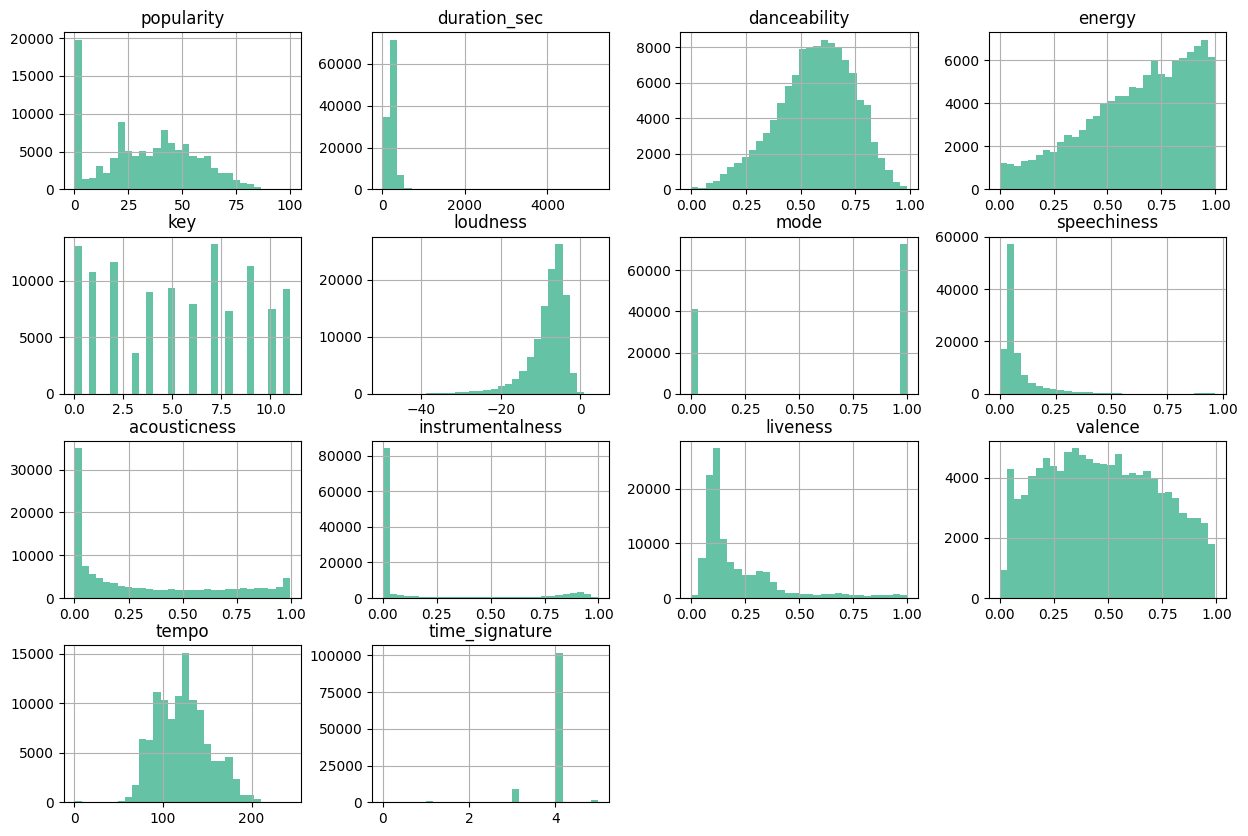

In [625]:
data.hist(figsize=(15, 10), bins=30)
plt.show()

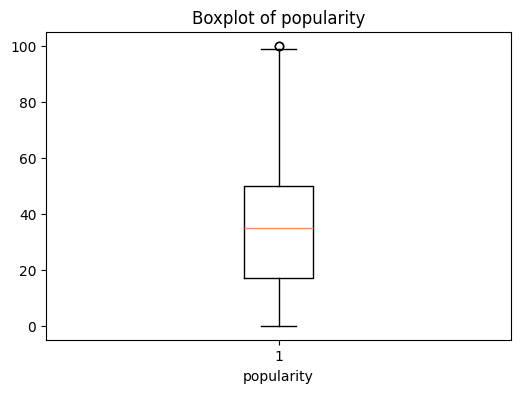

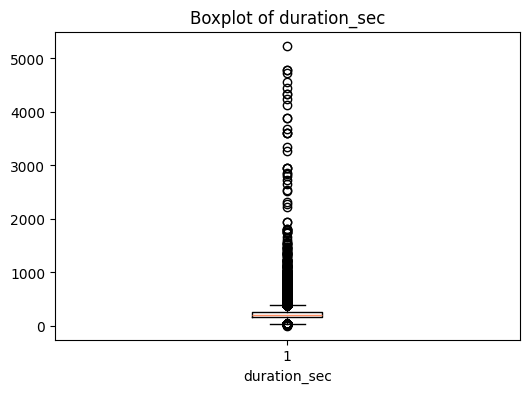

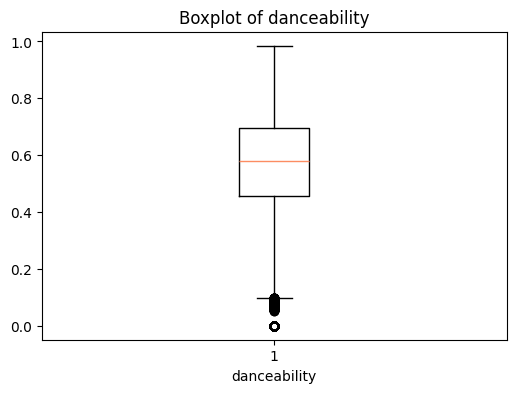

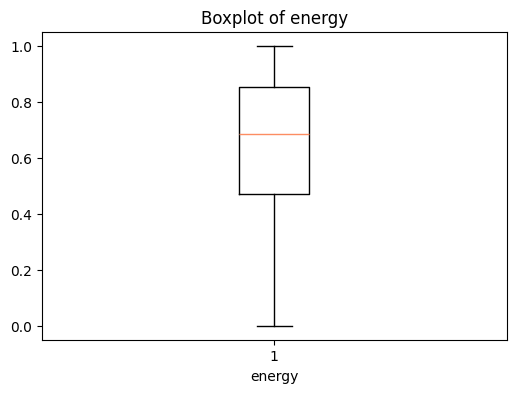

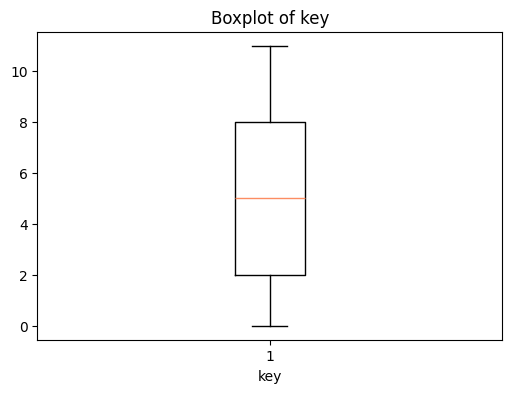

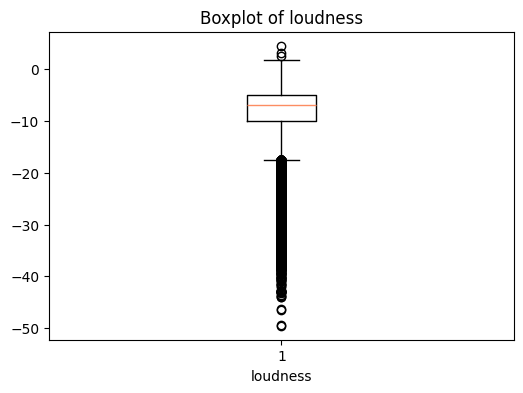

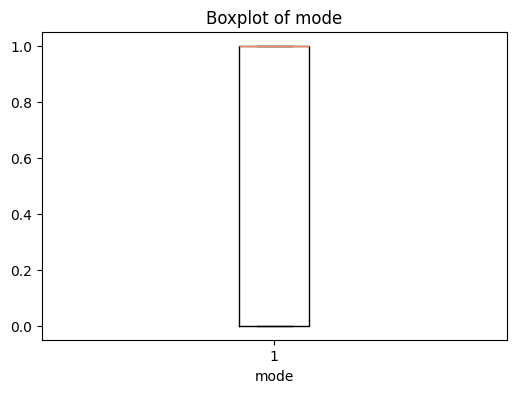

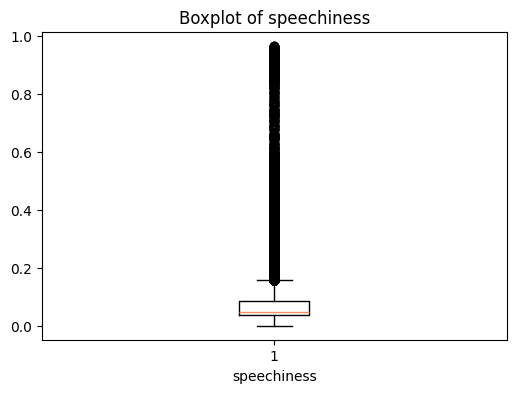

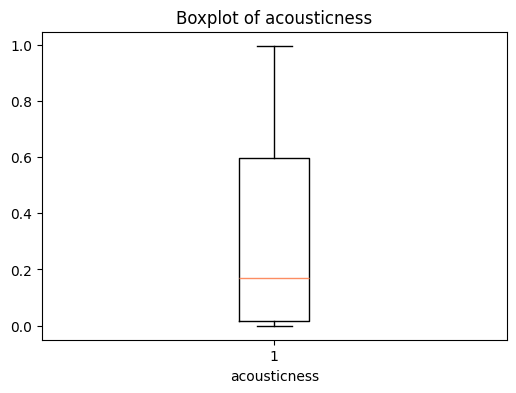

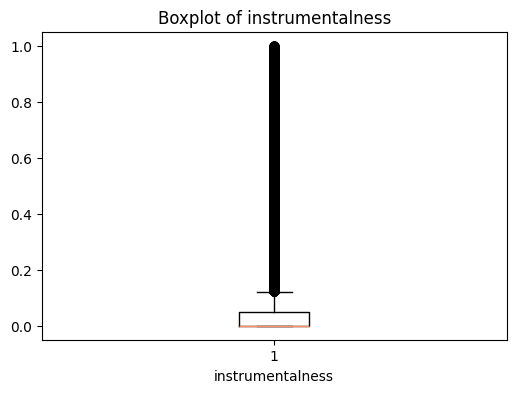

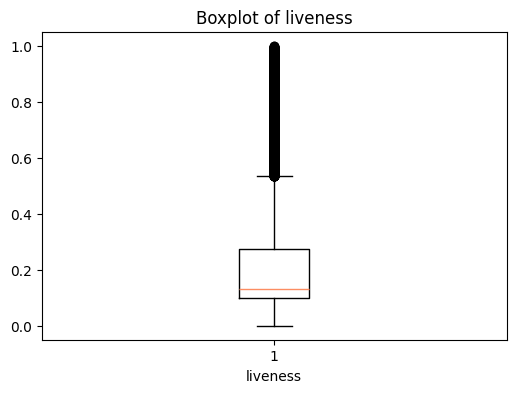

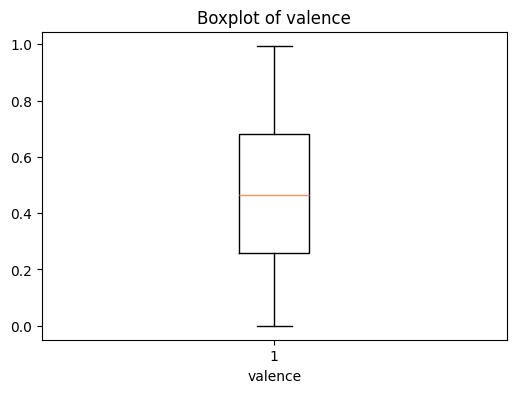

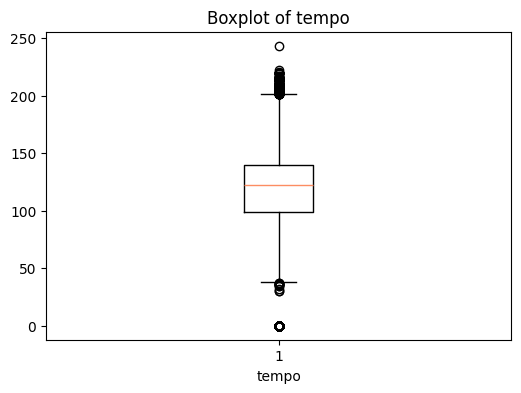

In [626]:
columns_to_plot = ['popularity', 'duration_sec', 'danceability', 'energy', 'key', 'loudness',
                   'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
                   'valence', 'tempo']

for column in columns_to_plot:
    plt.figure(figsize=(6, 4))
    plt.boxplot(data[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.show()

In [627]:
data = data.dropna()
data.isnull().sum()


track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_sec        0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

C:\Users\yaniy\AppData\Local\Temp\ipykernel_9168\2215742138.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, fmt=".1f", cmap=sns.color_palette("coolwarm", 12))


<Axes: >

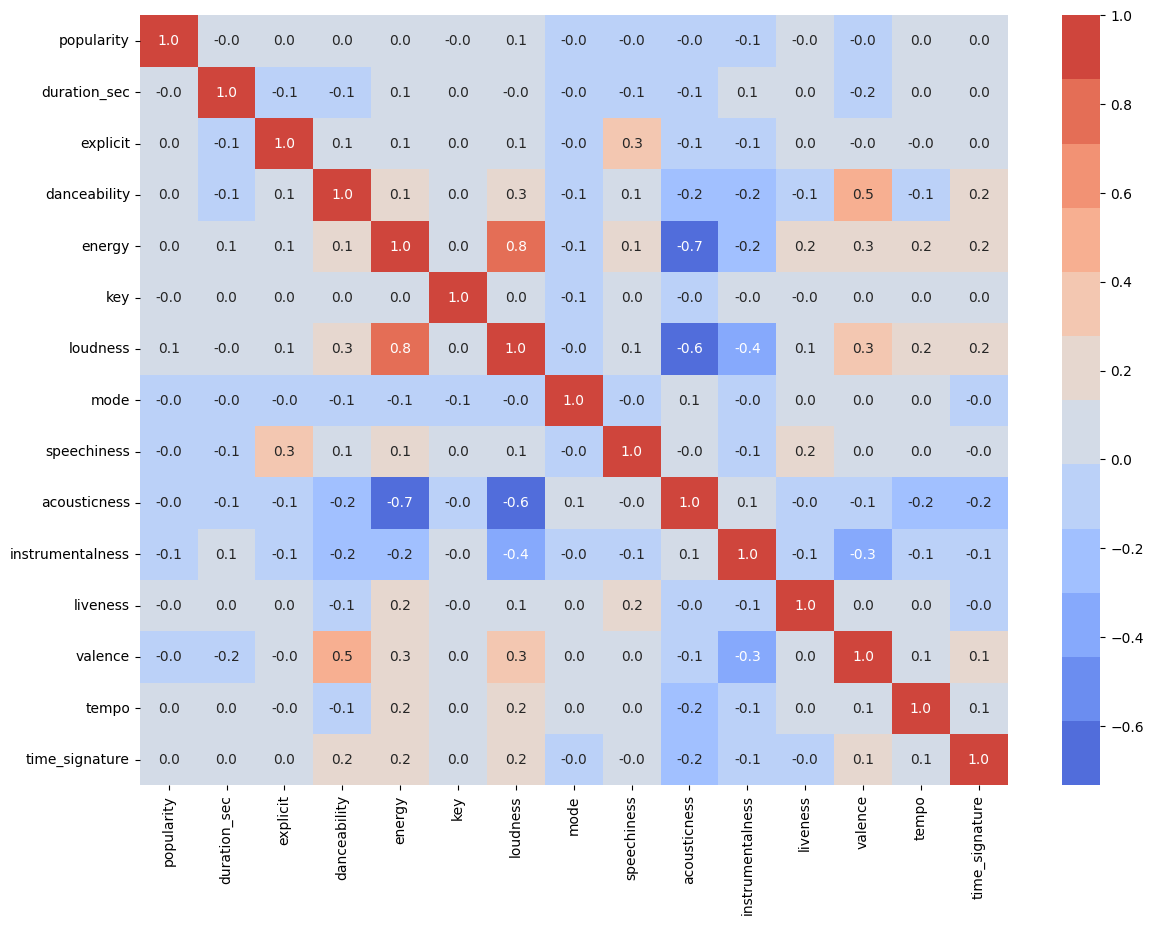

In [628]:
plt.figure(figsize=(14, 10))  # Adjust the figure size as needed
sns.heatmap(data.corr(), annot=True, fmt=".1f", cmap=sns.color_palette("coolwarm", 12))

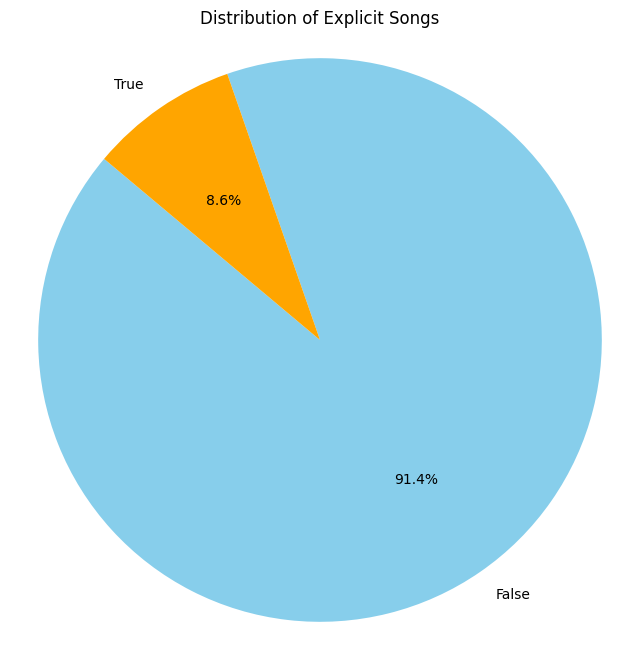

In [629]:
explicit_counts = data['explicit'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(explicit_counts, labels=explicit_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'orange'])
plt.title('Distribution of Explicit Songs')
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.
plt.show()

In [630]:
#data = data.drop(['track_id'], axis=1)
audio_features = ['popularity','tempo','danceability', 'energy', 'acousticness', 'speechiness', 
                  'instrumentalness', 'liveness', 'valence']

In [631]:
max_tempo = 190
min_tempo = 60


top_10_genre_data['tempo'] = (top_10_genre_data['tempo'] - min_tempo) / (max_tempo - min_tempo)
top_10_genre_data['popularity'] = top_10_genre_data['popularity'] / 100
average_audio_features = top_10_genre_data.groupby('track_genre')[audio_features].mean()


# Genre Analysis

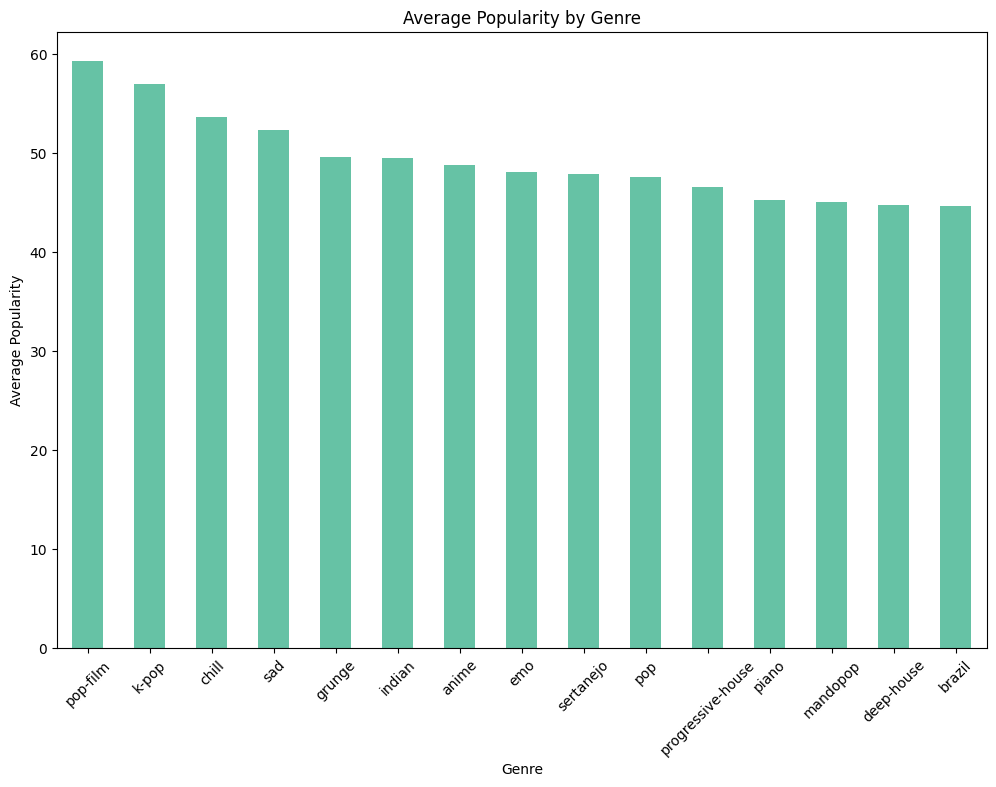

In [632]:
genre_popularity = data.groupby('track_genre')['popularity'].mean()
genre_popularity = data.groupby('track_genre')['popularity'].mean()
top_10_genres = genre_popularity.nlargest(10).index
top_10_genre_data = data[data['track_genre'].isin(top_10_genres)]

sorted_genre_popularity = genre_popularity.sort_values(ascending=False).head(15)

plt.figure(figsize=(12, 8))
sorted_genre_popularity.plot(kind='bar')
plt.xlabel('Genre')
plt.ylabel('Average Popularity')
plt.title('Average Popularity by Genre')
plt.xticks(rotation=45)
plt.show()

<Figure size 1200x800 with 0 Axes>

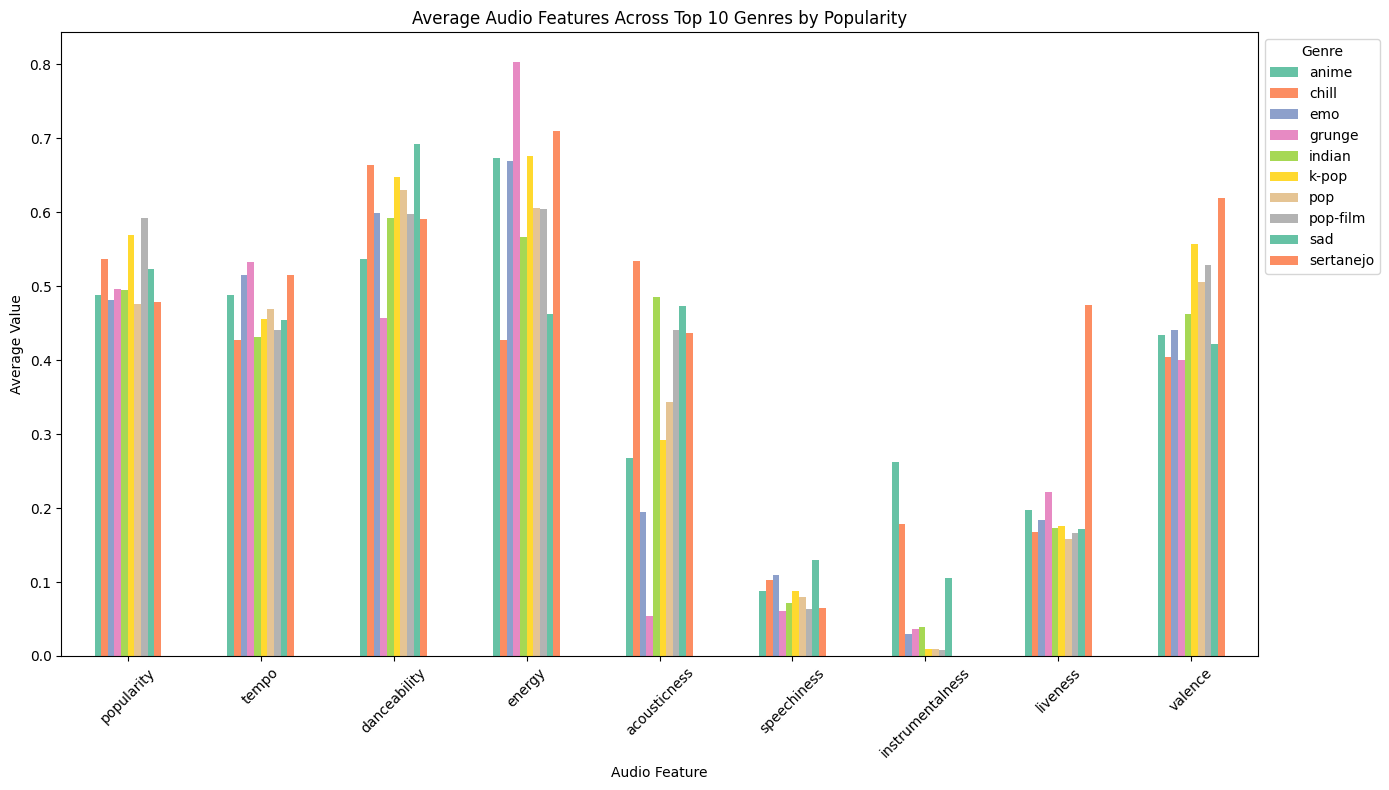

In [633]:
plt.figure(figsize=(12, 8))
sns.set_palette('Set2', len(top_10_genres))
average_audio_features.T.plot(kind='bar', figsize=(14, 8))
plt.title('Average Audio Features Across Top 10 Genres by Popularity')
plt.xlabel('Audio Feature')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.legend(title='Genre', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

In [634]:


genre_features = data.groupby('track_genre')[audio_features].mean()
top_15_genres = genre_popularity.sort_values(ascending=False).head(15).index

top_15_data = data[data['track_genre'].isin(top_15_genres)]
top_15_genre_features = top_15_data.groupby('track_genre')[audio_features].mean()


# Time-based Analysis

C:\Users\yaniy\AppData\Local\Temp\ipykernel_9168\2690947758.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='track_genre', y='tempo', data=top_10_genre_data, palette='viridis')


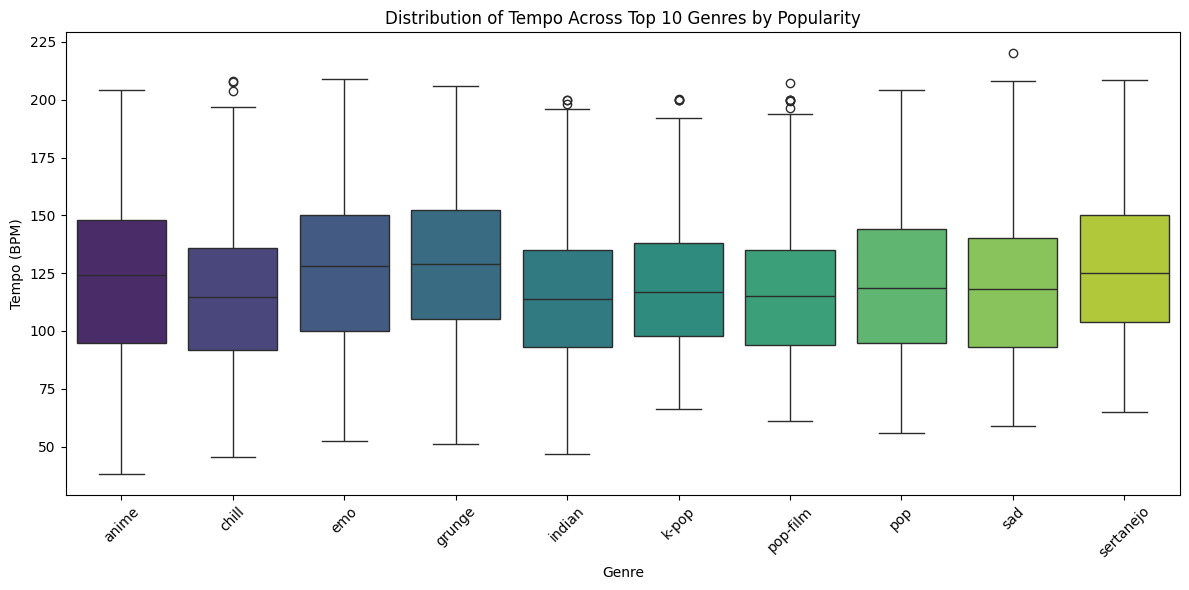

In [635]:
average_popularity_by_genre = data.groupby('track_genre')['popularity'].mean().sort_values(ascending=False)

top_10_genres = average_popularity_by_genre.head(10).index

top_10_genre_data = data[data['track_genre'].isin(top_10_genres)]

plt.figure(figsize=(12, 6))
sns.boxplot(x='track_genre', y='tempo', data=top_10_genre_data, palette='viridis')
plt.title('Distribution of Tempo Across Top 10 Genres by Popularity')
plt.xlabel('Genre')
plt.ylabel('Tempo (BPM)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Artist and Album Analysis

C:\Users\yaniy\AppData\Local\Temp\ipykernel_9168\1551093496.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_artists.index, y=top_10_artists.values, palette='viridis')


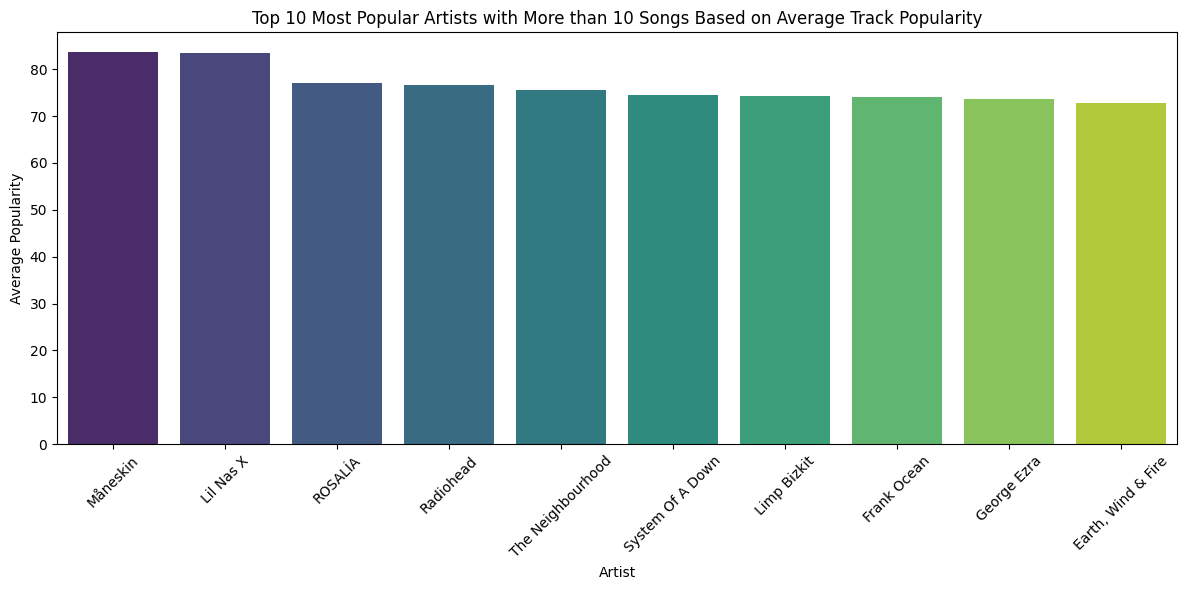

In [636]:
multi_artist_data = data.assign(artists=data['artists'].str.split(';')).explode('artists')

average_popularity_by_artist = multi_artist_data.groupby('artists')['popularity'].mean()

songs_per_artist = multi_artist_data['artists'].value_counts()
artists_with_more_than_10_songs = songs_per_artist[songs_per_artist > 10].index

top_10_artists = average_popularity_by_artist.loc[artists_with_more_than_10_songs].nlargest(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_artists.index, y=top_10_artists.values, palette='viridis')
plt.title('Top 10 Most Popular Artists with More than 10 Songs Based on Average Track Popularity')
plt.xlabel('Artist')
plt.ylabel('Average Popularity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\yaniy\AppData\Local\Temp\ipykernel_9168\4263525273.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frank_ocean_data['tempo'] = (frank_ocean_data['tempo'] - min_tempo) / (max_tempo - min_tempo)
C:\Users\yaniy\AppData\Local\Temp\ipykernel_9168\4263525273.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='popularity', y='track_name', data=top_5_frank_ocean_songs, palette='viridis')
C:\Users\yaniy\AppData\Local\Temp\ipykernel_9168\4263525273.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` 

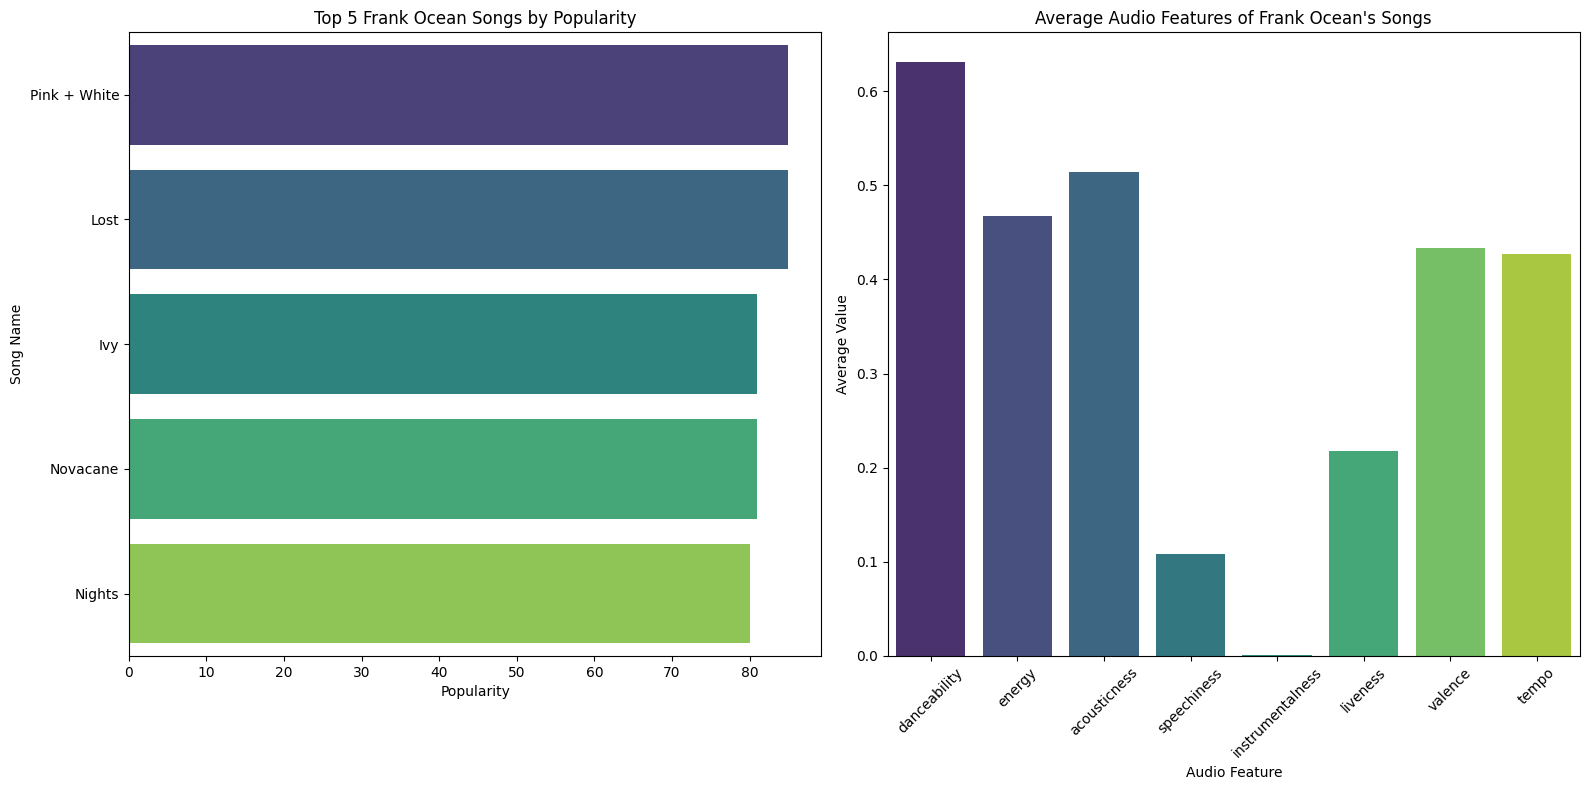

In [637]:
frank_ocean_data = data[data['artists'].str.contains('Frank Ocean', case=False)]

audio_features = ['danceability', 'energy', 'acousticness', 'speechiness', 
                  'instrumentalness', 'liveness', 'valence', 'tempo']
frank_ocean_data['tempo'] = (frank_ocean_data['tempo'] - min_tempo) / (max_tempo - min_tempo)
average_audio_features_frank_ocean = frank_ocean_data[audio_features].mean()

frank_ocean_data_sorted = frank_ocean_data.sort_values(by='popularity', ascending=False)
top_5_frank_ocean_songs = frank_ocean_data_sorted.head(5)

plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
sns.barplot(x='popularity', y='track_name', data=top_5_frank_ocean_songs, palette='viridis')
plt.title('Top 5 Frank Ocean Songs by Popularity')
plt.xlabel('Popularity')
plt.ylabel('Song Name')
#plt.xlim(0, 100)

plt.subplot(1, 2, 2)
sns.barplot(x=average_audio_features_frank_ocean.index, y=average_audio_features_frank_ocean.values, palette='viridis')
plt.title('Average Audio Features of Frank Ocean\'s Songs')
plt.xlabel('Audio Feature')
plt.ylabel('Average Value')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


# Key and Mode Analysis

C:\Users\yaniy\AppData\Local\Temp\ipykernel_9168\3449199646.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=key_labels, y=key_counts.values, palette='viridis')
C:\Users\yaniy\AppData\Local\Temp\ipykernel_9168\3449199646.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mode_counts.index, y=mode_counts.values, palette='viridis')


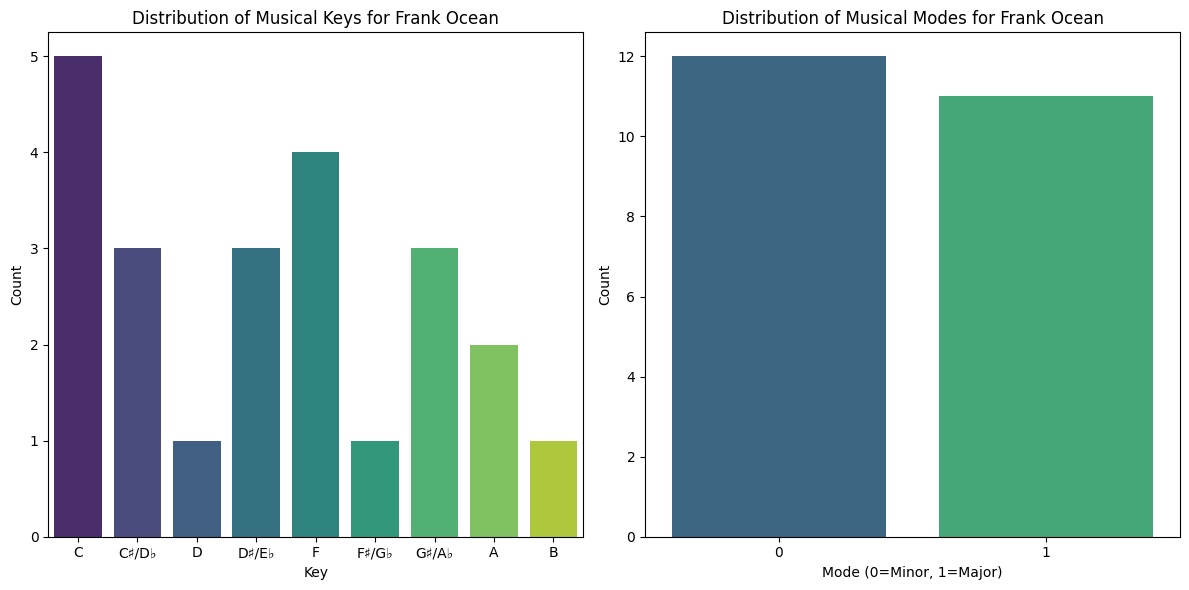

C:\Users\yaniy\AppData\Local\Temp\ipykernel_9168\3449199646.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=time_signature_counts.index, y=time_signature_counts.values, palette='viridis')


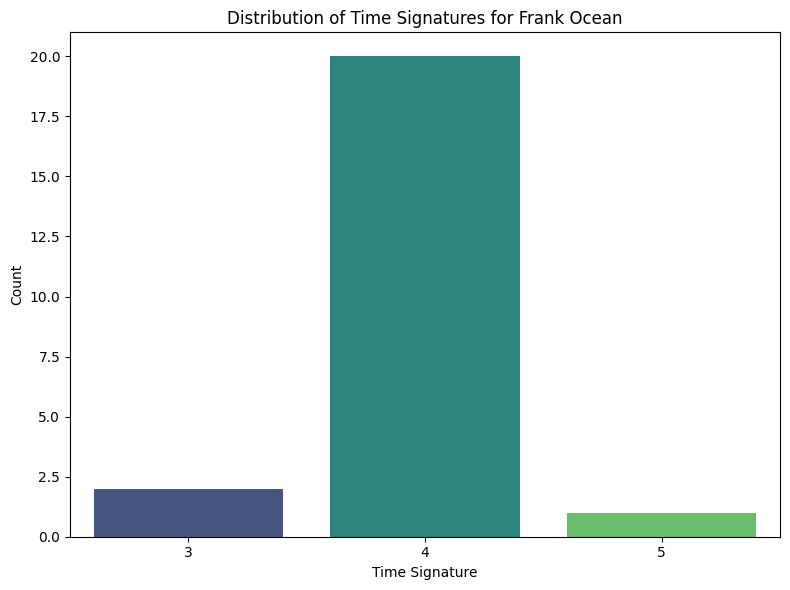

In [638]:
key_map = {
    -1: 'No Key Detected',
    0: 'C',
    1: 'C♯/D♭',
    2: 'D',
    3: 'D♯/E♭',
    4: 'E',
    5: 'F',
    6: 'F♯/G♭',
    7: 'G',
    8: 'G♯/A♭',
    9: 'A',
    10: 'A♯/B♭',
    11: 'B'
}

key_counts = frank_ocean_data['key'].value_counts().sort_index()

mode_counts = frank_ocean_data['mode'].value_counts().sort_index()
key_labels = [key_map[key] for key in key_counts.index]

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=key_labels, y=key_counts.values, palette='viridis')
plt.title('Distribution of Musical Keys for Frank Ocean')
plt.xlabel('Key')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.barplot(x=mode_counts.index, y=mode_counts.values, palette='viridis')
plt.title('Distribution of Musical Modes for Frank Ocean')
plt.xlabel('Mode (0=Minor, 1=Major)')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

time_signature_counts = frank_ocean_data['time_signature'].value_counts().sort_index()

plt.figure(figsize=(8, 6))

sns.barplot(x=time_signature_counts.index, y=time_signature_counts.values, palette='viridis')
plt.title('Distribution of Time Signatures for Frank Ocean')
plt.xlabel('Time Signature')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

C:\Users\yaniy\AppData\Local\Temp\ipykernel_9168\2131549118.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frank_ocean_data['duration_min'] = frank_ocean_data['duration_sec'] / 60


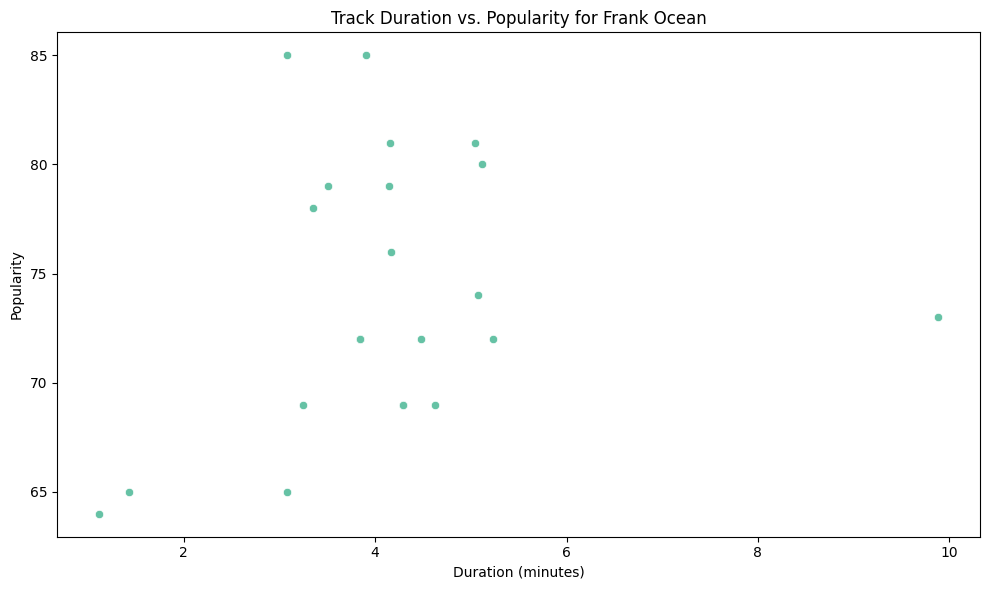

In [639]:
frank_ocean_data['duration_min'] = frank_ocean_data['duration_sec'] / 60
plt.figure(figsize=(10, 6))
sns.scatterplot(x='duration_min', y='popularity', data=frank_ocean_data)
plt.title('Track Duration vs. Popularity for Frank Ocean')
plt.xlabel('Duration (minutes)')
plt.ylabel('Popularity')
plt.tight_layout()
plt.show()


# How to recommend a song based on another song?

In [640]:
data = data.drop(['time_signature', 'key'], axis=1) 
# we drop the columns time_signature and key because they are not related to the recommendation process

In [641]:
data.drop_duplicates(subset=['track_id'], inplace=True)
#we drop duplicate rows which are the same song in a different albums or singles

In [642]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()

numerical_cols = data.select_dtypes(include=np.number).columns
data_norm = pd.DataFrame(scaler.fit_transform(data[numerical_cols]), columns=numerical_cols, index=data['track_id'])

In [643]:
trackNameListened = "Knockin' On Heaven's Door"
track_id = data[(data['track_name'] == trackNameListened)][['track_id']]
track_id = track_id.values[0][0]

target_track = data_norm.loc[track_id].tolist()

In [646]:
weights = {
    'danceability': 1.0,
    'energy': 1.0,
    'valence': 0.9,
    'tempo': 0.9,
    'acousticness': 0.5,
    'instrumentalness': 0.5,
    'loudness': 0.3,
    'speechiness': 0.3,
    'liveness': 0.3,
    'popularity': 0.2,
    'mode': 0.2,
    'duration_sec': 0.2
}

weighted_data_norm = data_norm.copy()
for feature, weight in weights.items():
    weighted_data_norm[feature] *= weight

weighted_target_track = target_track * np.array(list(weights.values()))


In [647]:
data_result = pd.DataFrame()
data_result['euclidean'] = [distance.euclidean(obj, weighted_target_track) for index, obj in weighted_data_norm.iterrows()]
data_result['track_id'] = weighted_data_norm.index

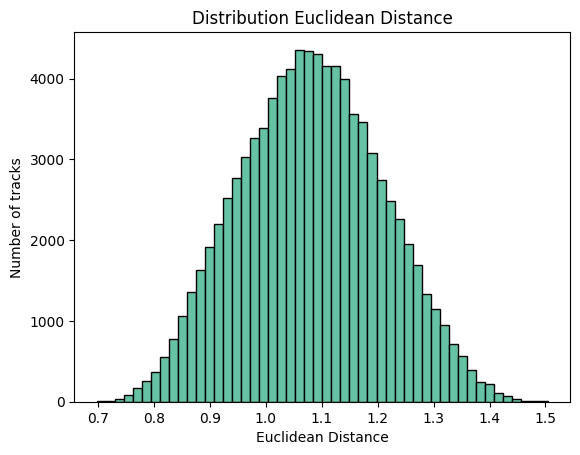

In [648]:
plt.hist(data_result['euclidean'], bins=50, edgecolor='black')

plt.xlabel('Euclidean Distance')
plt.ylabel('Number of tracks')

plt.title('Distribution Euclidean Distance')

plt.show()

In [649]:
data_rec = data_result.sort_values(by=['euclidean'])

# Filter out the target song itself
target_track_name = data[data['track_id'] == track_id]['track_name'].values[0]
data_rec = data_rec[data_rec['track_id'] != track_id]

# Get the 5 closest tracks, ensuring the target song is not included
closest_tracks = data_rec.iloc[:5]['track_id'].tolist()

In [650]:
features = data_norm.columns.tolist()
num_vars = len(features)

# Compute angle for each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # complete the loop

# Extract feature data for radar chart
target_data = target_track + target_track[:1]

# Prepare the closest tracks data
closest_data_list = []
for track_id in closest_tracks:
    closest_track_data = data_norm.loc[track_id].tolist() + data_norm.loc[track_id][:1].tolist()
    closest_data_list.append(closest_track_data)


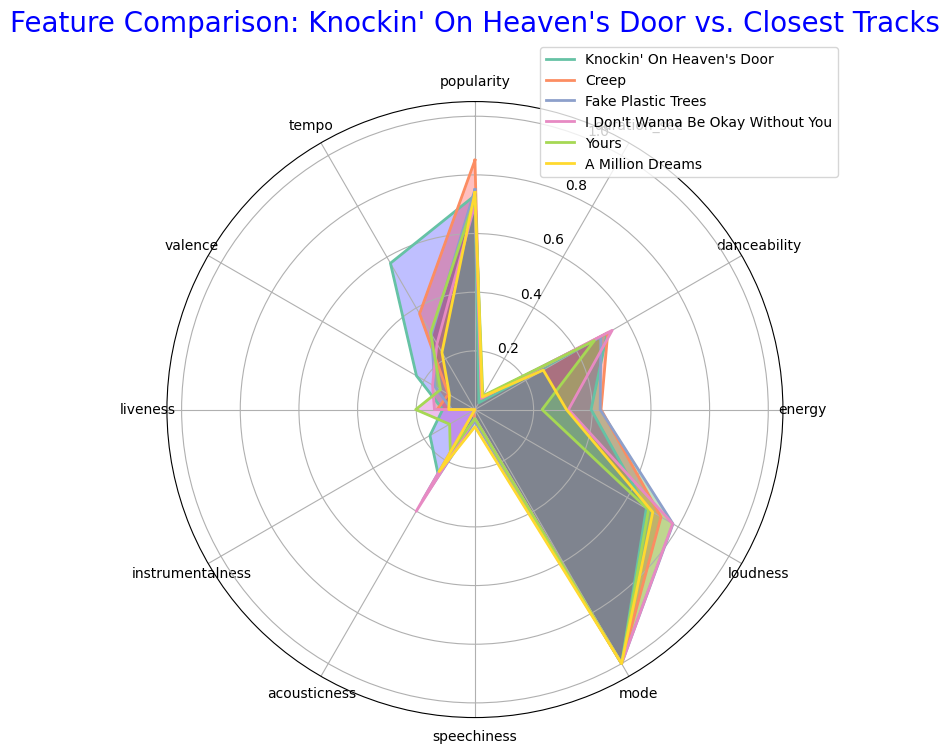

In [651]:
def create_radar_chart(features, target_data, closest_data_list, track_name, closest_track_names):
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)

    plt.xticks(angles[:-1], features)

    # Plot target track
    ax.plot(angles, target_data, linewidth=2, linestyle='solid', label=track_name)
    ax.fill(angles, target_data, color='b', alpha=0.25)

    # Plot each of the closest tracks
    colors = ['r', 'g', 'y', 'm', 'c']
    for i, closest_data in enumerate(closest_data_list):
        ax.plot(angles, closest_data, linewidth=2, linestyle='solid', label=closest_track_names[i])
        ax.fill(angles, closest_data, color=colors[i], alpha=0.25)

    plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
    plt.title(f'Feature Comparison: {track_name} vs. Closest Tracks', size=20, color='blue', y=1.1)
    plt.show()

# Get track names for the title
closest_track_names = data[data['track_id'].isin(closest_tracks)]['track_name'].tolist()

# Create the radar chart
create_radar_chart(features, target_data, closest_data_list, trackNameListened, closest_track_names)
